> This is a [Comments] Reference

[Comments]: https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd "analytics vidhya"

### How to Approach a Machine Learning Problem

Here's a strategy you can apply to approach any machine learning problem:

1. `Explore the data and find correlations between inputs and targets`
2. `Pick the right model, loss functions and optimizer for the problem at hand`
3. `Scale numeric variables and one-hot encode categorical data`
4. `Set aside a test set (using a fraction of the training set)`
5. `Train the model`
6. `Make predictions on the test set and compute the loss`

We'll apply this process to several problems in future tutorials.

In [197]:
from urllib.request import urlretrieve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib
import plotly.express as px

In [198]:
url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
urlretrieve(url, 'medical.csv')
data = pd.read_csv('medical.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [199]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


`BMI` = weight / (height)**2

# **Check all datatypes of all columns.**

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# **Visualization**

In [201]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.facecolor'] = '#00000000'

### **`Age`**

In [202]:
data.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [203]:
fig = px.histogram(data, x='age', nbins=47, marginal='box', title='Distribution of Age')
fig.update_layout(bargap=0.1)
# fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isn't a big variation in the [number of people of any given age] (between 18 & 64) in the USA.

[number of people of any given age]:https://www.statista.com/statistics/241488/population-of-the-us-by-sex-and-age/

## **`Body Mass Index`**

In [204]:
fig = px.histogram(data, x='bmi', marginal='box', color_discrete_sequence=['red'], title='Distribution of BMI')
fig.update_layout(bargap=0.2)

The measurements of body mass index seem to form a [`Gaussian distribution`](https://en.wikipedia.org/wiki/Normal_distribution) centered around the value 30, with a few outliers towards the right. Here's how BMI values can be interpreted ([`source`](https://study.com/academy/lesson/what-is-bmi-definition-formula-calculation.html)):

![](https://i.imgur.com/lh23OiY.jpg)

> **EXERCISE**: Can you explain why the distribution of ages forms a uniform distribution while the distribution of BMIs forms a gaussian distribution?
>
> ???

## **`Charges`**

In [205]:
fig = px.histogram(data, x='charges', marginal='box', color='smoker', color_discrete_sequence=['green', 'red'], title='Annual Medical Charges')
fig.update_layout(bargap=0.1)

We can make the following observations from the above graph:

* For most customers, the annual medical charges are under \\$10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
* There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is \\$7300, the median for smokers is close to \\$35,000.


> **EXERCISE**: Visualize the distribution of medical charges in connection with other factors like "sex" and "region". What do you observe?

In [206]:
fig = px.histogram(data, x='bmi', marginal='box', color='sex', color_discrete_sequence=['pink', 'skyblue'], title='Total Population by gender category')
fig.update_layout(bargap=0.1)

In [207]:
fig = px.histogram(data, x='bmi', marginal='box', color='region', color_discrete_sequence=['green', 'blue', 'pink', 'yellow'], title='Insurance by Region')
fig.update_layout(bargap=0.1)

## **`Smoker`**

In [208]:
data_smoker = data.smoker.value_counts()
fig = px.histogram(data, x='smoker', color='sex', title='Smoker')
fig.update_layout(bargap=0.1)

> **EXERCISE**: Visualize the distributions of the "sex", "region" and "children" columns and report your observations. 

In [209]:
fig = px.histogram(data, x='smoker', color='children', title='smoker')
fig.update_layout(bargap=0.1)

## **`Age & Charges`**

In [210]:
fig = px.scatter(data, x='age', y='charges', color='smoker', opacity=0.8, hover_data=['sex'], title='Age vs. Charges')
fig.update_traces(marker_size=5)

## **`BMI and Charges`**

In [211]:
fig = px.scatter(data, x='bmi', y='charges', color='smoker', opacity=0.8, hover_data=['sex'], title='BMI vs. Charges')
fig.update_traces(marker_size=5)

> **EXERCISE**: Create some more graphs to visualize how the "charges" column is related to other columns ("children", "sex", "region" and "smoker"). Summarize the insights gathered from these graphs.
>
> *Hint*: Use violin plots (`px.violin`) and bar plots (`sns.barplot`)

In [212]:
px.violin(data, x='smoker', y='charges', color='sex')

In [213]:
px.violin(data, x='children', y='charges', color='sex')

In [214]:
fig = px.histogram(data, x='children', y='charges', color='sex', hover_data=['region'], nbins=30)
fig.update_layout(bargap=0.1)

# **Correlation**

<ul>As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the correlation coefficient, which can be computed using the .corr method of a Pandas series.</ul>

In [215]:
data.charges.corr(data.age)

0.2990081933306476

In [216]:
data.charges.corr(data.bmi)

0.19834096883362895

In [217]:
data.charges.corr(data.children)

0.06799822684790478

In [218]:
smoker_value = {'no' : 0, 'yes' : 1}
smoker_num = data.smoker.map(smoker_value)
data.charges.corr(smoker_num)

0.787251430498478




Here's how correlation coefficients can be interpreted ([source](https://statisticsbyjim.com/basics/correlations)):

* **Strength**: The greater the absolute value of the correlation coefficient, the stronger the relationship.

    * The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

    * A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.
    
    * When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.


* **Direction**: The sign of the correlation coefficient represents the direction of the relationship.

    * Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.
    
    * Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Here's the same relationship expressed visually ([source](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)):

<img src="https://i.imgur.com/3XUpDlw.png" width="360">

The correlation coefficient has the following formula:

<img src="https://i.imgur.com/unapugP.png" width="360">

You can learn more about the mathematical definition and geometric interpretation of correlation here: https://www.youtube.com/watch?v=xZ_z8KWkhXE

Pandas dataframes also provide a `.corr` method to compute the correlation coefficients between all pairs of numeric columns.

In [219]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

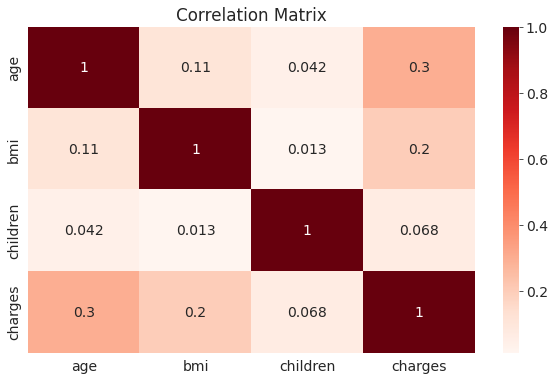

In [220]:
sns.heatmap(data.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

**Correlation vs causation fallacy:** Note that a high correlation cannot be used to interpret a cause-effect relationship between features. Two features $X$ and $Y$ can be correlated if $X$ causes $Y$ or if $Y$ causes $X$, or if both are caused independently by some other factor $Z$, and the correlation will no longer hold true if one of the cause-effect relationships is broken. It's also possible that $X$ are $Y$ simply appear to be correlated because the sample is too small. 

While this may seem obvious, computers can't differentiate between correlation and causation, and decisions based on automated system can often have major consequences on society, so it's important to study why automated systems lead to a given result. Determining cause-effect relationships requires human insight.

# `Linear Regression using a Single Feature`

We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [221]:
non_smoker = data[data.smoker == 'no']

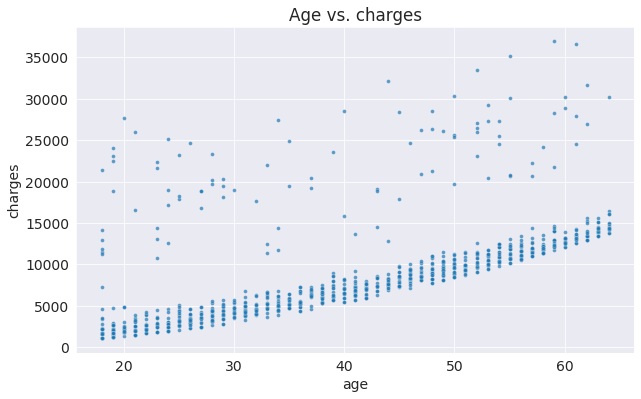

In [222]:
plt.title('Age vs. charges')
sns.scatterplot(data=non_smoker, x='age', y='charges', alpha=0.7, s=15)

Apart from a few exceptions, the points seem to form a line. We'll try and "fit" a line using this points, and use the line to predict charges for a given age. A line on the X&Y coordinates has the following formula:

$y = wx + b$

The line is characterized two numbers: $w$ (called "slope") and $b$ (called "intercept"). 

### `Model`

In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assume the following relationship between the two:

$charges = w \times age + b$

We'll try determine $w$ and $b$ for the line that best fits the data. 

* This technique is called _linear regression_, and we call the above equation a _linear regression model_, because it models the relationship between "age" and "charges" as a straight line. 

* The numbers $w$ and $b$ are called the _parameters_ or _weights_ of the model.

* The values in the "age" column of the dataset are called the _inputs_ to the model and the values in the charges column are called "targets". 

Let define a helper function `estimate_charges`, to compute $charges$, given $age$, $w$ and $b$.


In [223]:
def estimated_charges(age, w, b):
  return w * age + b

In [224]:
w = 50
b = 100
ages = non_smoker.age
estimate = estimated_charges(ages, w, b)
estimate

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [225]:
non_smoker.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Text(0, 0.5, 'Estimated Charges')

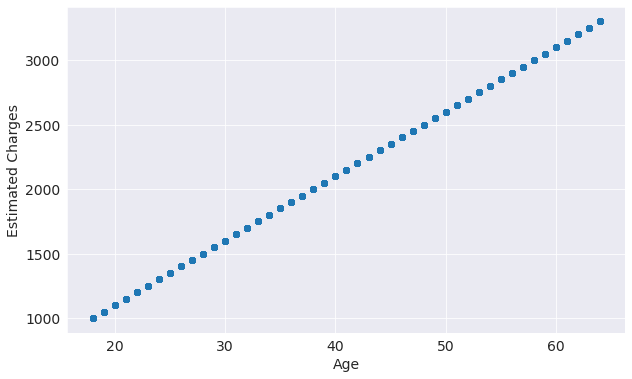

In [226]:
plt.scatter(ages, estimate)
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

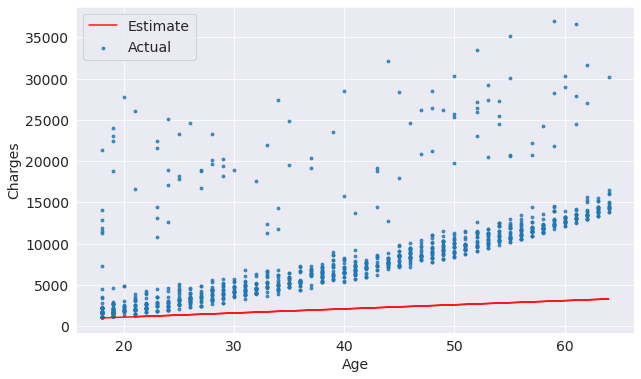

In [227]:
target = non_smoker.charges
plt.plot(ages, estimate, 'r', alpha=0.9)
plt.scatter(ages, target, s=8, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])

In [228]:
def try_parameter(w, b):
  ages = non_smoker.age
  target = non_smoker.charges
  estimate = estimated_charges(ages, w, b)
  plt.plot(ages, estimate, 'r', alpha=0.9)
  plt.scatter(ages, target, s=8, alpha=0.8)
  plt.xlabel('age')
  plt.ylabel('charges')
  plt.legend(['Estimate', 'Actual'])

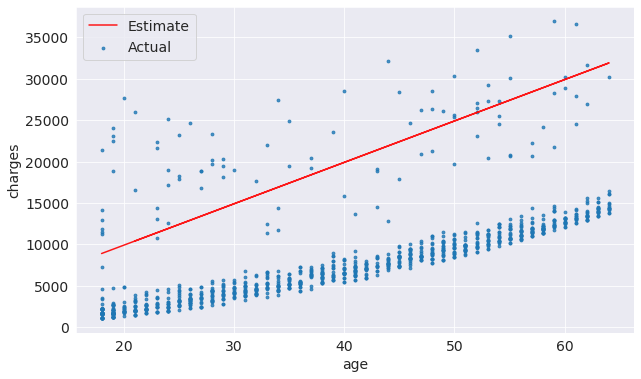

In [229]:
try_parameter(500, -100)

As we change the values, of $w$ and $b$ manually, trying to move the line visually closer to the points, we are _learning_ the approximate relationship between "age" and "charges". 

Wouldn't it be nice if a computer could try several different values of `w` and `b` and _learn_ the relationship between "age" and "charges"? To do this, we need to solve a couple of problems:

1. We need a way to measure numerically how well the line fits the points.

2. Once the "measure of fit" has been computed, we need a way to modify `w` and `b` to improve the the fit.

If we can solve the above problems, it should be possible for a computer to determine `w` and `b` for the best fit line, starting from a random guess.

### `Loss/Cost Function`

We can compare our model's predictions with the actual targets using the following method:

* Calculate the difference between the targets and predictions (the differenced is called the "residual")
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* Take the square root of the result

The result is a single number, known as the **root mean squared error** (RMSE). The above description can be stated mathematically as follows: 

<img src="https://i.imgur.com/WCanPkA.png" width="360">

Geometrically, the residuals can be visualized as follows:

<img src="https://i.imgur.com/ll3NL80.png" width="420">

Let's define a function to compute the RMSE.

In [230]:
def rmse(target, prediction):
  return np.sqrt(np.mean(np.square(target - prediction)))

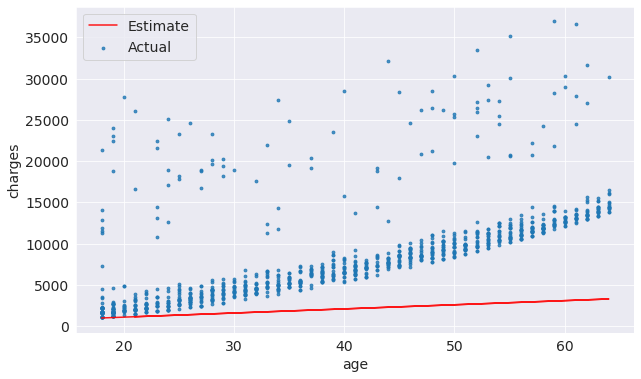

In [231]:
w = 50
b = 100
try_parameter(w, b)

In [232]:
target = non_smoker.charges
prediction = estimated_charges(non_smoker.age, w, b)

In [233]:
rmse(target, prediction)

8461.949562575488

In [234]:
def try_parameter(w, b):
  ages = non_smoker.age
  target = non_smoker.charges
  predictions = estimated_charges(ages, w, b)

  plt.plot(ages, predictions, 'r', alpha=0.9)
  plt.scatter(ages, target, s=8, alpha=0.8)
  plt.xlabel('age')
  plt.ylabel('charges')
  plt.legend(['Predictions', 'Actual'])

  loss = rmse(target, predictions)
  print('RMSE: {}'.format(loss))

RMSE: 4700.736524304105


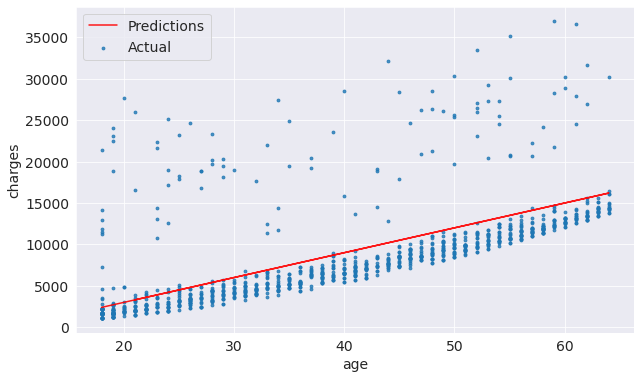

In [235]:
try_parameter(300, -3000)

### `Optimizer`

Next, we need a strategy to modify weights `w` and `b` to reduce the loss and improve the "fit" of the line to the data.

* Ordinary Least Squares: https://www.youtube.com/watch?v=szXbuO3bVRk (better for smaller datasets)
* Stochastic gradient descent: https://www.youtube.com/watch?v=sDv4f4s2SB8 (better for larger datasets)

Both of these have the same objective: to minimize the loss, however, while ordinary least squares directly computes the best values for `w` and `b` using matrix operations, while gradient descent uses a iterative approach, starting with a random values of `w` and `b` and slowly improving them using derivatives. 

Here's a visualization of how gradient descent works:

![](https://miro.medium.com/max/1728/1*NO-YvpHHadk5lLxtg4Gfrw.gif)

Doesn't it look similar to our own strategy of gradually moving the line closer to the points?


# `Linear Regression using Scikit-learn`

In practice, you'll never need to implement either of the above methods yourself. You can use a library like `scikit-learn` to do this for you. 

In [236]:
from sklearn.linear_model import LinearRegression

In [237]:
model = LinearRegression()
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [238]:
inputs = non_smoker[['age']]
target = non_smoker.charges
print('Input Type: {}, Input Shape : {}'.format(type(inputs), inputs.shape))
print(f'Target Type: {type(target)}, Target Shape : {target.shape}')

Input Type: <class 'pandas.core.frame.DataFrame'>, Input Shape : (1064, 1)
Target Type: <class 'pandas.core.series.Series'>, Target Shape : (1064,)


In [239]:
model.fit(inputs, target)
model.predict(np.array([[23], [37], [61]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [240]:
predictions = model.predict(inputs)

In [241]:
rmse(target, predictions)

4662.505766636391

In [242]:
print(target - predictions)

1        -993.507574
2        -942.087003
3       15256.677043
4       -2593.689454
5       -2436.674141
            ...     
1332     -393.837911
1333     -670.476785
1334     -513.079074
1335    -1089.226374
1336    -1512.861613
Name: charges, Length: 1064, dtype: float64


In [243]:
# w
model.coef_

array([267.24891283])

In [244]:
# b
model.intercept_

-2091.4205565650864

RMSE: 4662.505766636391


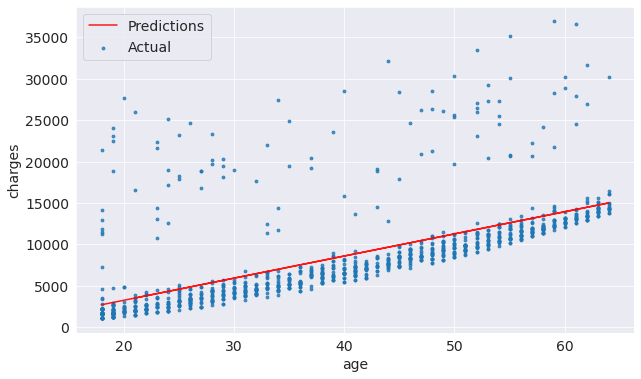

In [245]:
try_parameter(model.coef_, model.intercept_)

> **EXERCISE**: Use the [`SGDRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) class from `scikit-learn` to train a model using the stochastic gradient descent technique. Make predictions and compute the loss. Do you see any difference in the result?

In [246]:
from sklearn.linear_model import SGDRegressor

In [247]:
model_s = SGDRegressor()
model_s.fit(inputs, target)
predictions = model_s.predict(inputs)
rmse(target, predictions)

5199.16302587819

RMSE: 5199.16302587819


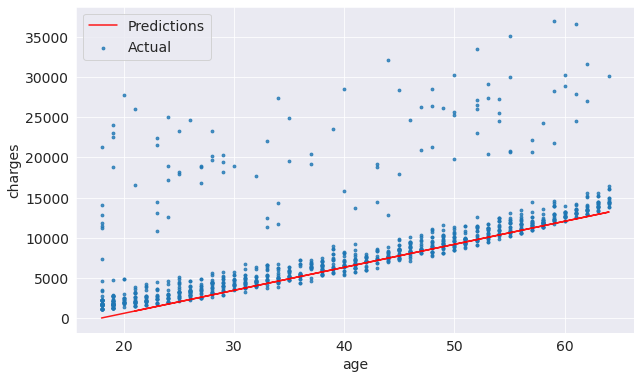

In [248]:
try_parameter(model_s.coef_, model_s.intercept_)

> **EXERCISE**: Repeat the steps is this section to train a linear regression model to estimate medical charges for smokers. Visualize the targets and predictions, and compute the loss.

In [249]:
smoker = data[data.smoker=='yes']

In [250]:
def estimated_charges(age, w, b):
  return age*w+b
def rmse(target, predictions):
  return np.sqrt(np.mean(np.square(target-predictions)))

In [251]:
def try_parameter(w, b):
  inputs = smoker.age
  target = smoker.charges
  predictions = estimated_charges(inputs, w, b)

  plt.plot(inputs, predictions, 'r', alpha=0.8)
  plt.scatter(inputs, target, s=8, alpha=0.7)
  plt.xlabel('age')
  plt.ylabel('charges')
  plt.legend(['actual', 'Predictions'])

  loss = rmse(target, predictions)
  print(f'RMSE: {loss}')

RMSE: 15682.995516513321


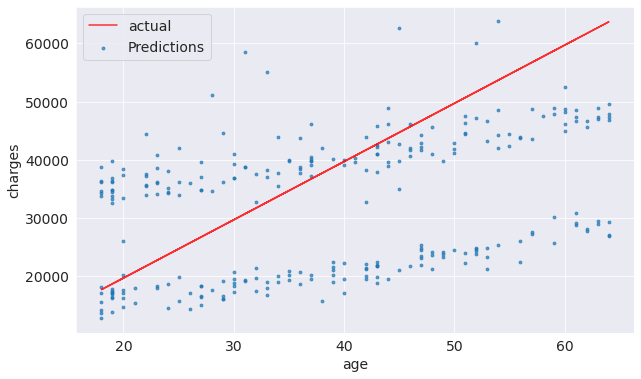

In [252]:
try_parameter(1000,-300)

In [253]:
inputs = smoker[['age']]
target = smoker.charges
model.fit(inputs, target)
predictions = model.predict(inputs)
loss = rmse(target, predictions)
loss

10711.00334810241

In [254]:
print(f'w : {model.coef_}, b : {model.intercept_}')

w : [305.23760211], b : 20294.128126915966


RMSE: 10711.00334810241


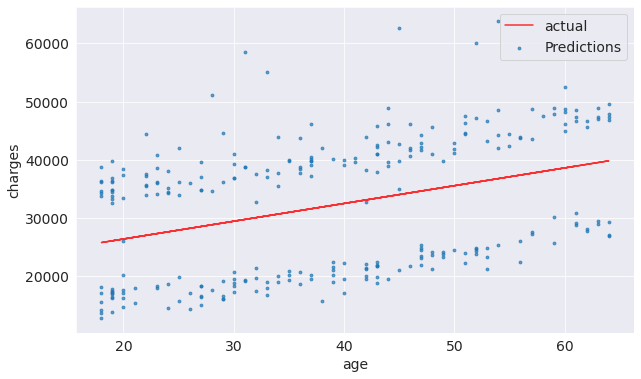

In [255]:
try_parameter(model.coef_, model.intercept_)

In [256]:
inputs, target = smoker[['bmi']], smoker.charges
model = LinearRegression().fit(inputs, target)
predictions = model.predict(inputs)
loss = rmse(target, predictions)
print(f'RMSE : {loss}')

RMSE : 6811.59740830196


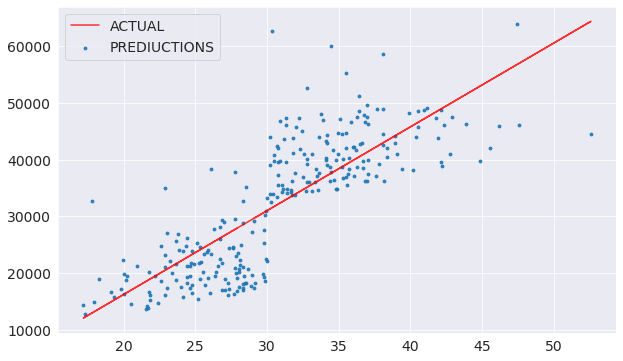

In [257]:
plt.plot(inputs, predictions, 'r', alpha=0.8)
plt.scatter(inputs, target, s=8, alpha=0.9)
plt.legend(['ACTUAL', 'PREDIUCTIONS'])

In [258]:
model_s.fit(inputs, target)
predictions = model_s.predict(inputs)
loss = rmse(target, predictions)
loss

775269133.3244482

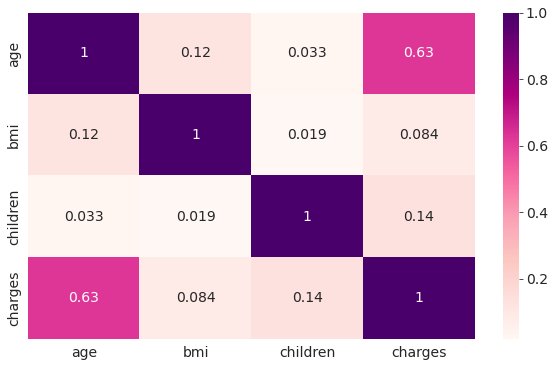

In [259]:
sns.heatmap(non_smoker.corr(), cmap='RdPu', annot=True)

### Machine Learning

Congratulations, you've just trained your first _machine learning model!_ Machine learning is simply the process of computing the best parameters to model the relationship between some feature and targets. 

Every machine learning problem has three components:

1. **Model**

2. **Cost Function**

3. **Optimizer**

We'll look at several examples of each of the above in future tutorials. Here's how the relationship between these three components can be visualized:

<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

# `Linear Regression using Multiple Features`

So far, we've used on the "age" feature to estimate "charges". Adding another feature like "bmi" is fairly straightforward. We simply assume the following relationship:

$charges = w_1 \times age + w_2 \times bmi + b$

We need to change just one line of code to include the BMI.

In [260]:
inputs, target = non_smoker[['age', 'bmi']], non_smoker.charges
model = LinearRegression().fit(inputs, target)
predictions = model.predict(inputs)
loss = rmse(target, predictions)
print(f'RMSE : {loss}')

RMSE : 4662.312835461297


In [261]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

> ## **$No Relation Found between Medical charges & BMI in Non Smoking person$**

In [262]:
non_smoker.charges.corr(non_smoker.bmi)

0.0840365431283327

In [263]:
fig = px.scatter(data, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size = 5)

In [264]:
fig = px.scatter_3d(non_smoker, x='age', y='children', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)

Let's go one step further, and add the final numeric column: "children", which seems to have some correlation with "charges".

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + b$

In [265]:
non_smoker.charges.corr(non_smoker.children)

0.13892870453542192

In [266]:
fig = px.strip(non_smoker, x='children', y='charges', title='Children vs. Charges')
fig.update_traces(marker_size=5)

In [267]:
inputs, target = non_smoker[['age', 'bmi', 'children']], non_smoker.charges
model = LinearRegression().fit(inputs, target)
predictions = model.predict(inputs)
loss = rmse(target, predictions)
print(f'RMSE : {loss}')

RMSE : 4608.470405038245


> **EXERCISE**: Repeat the steps is this section to train a linear regression model to estimate medical charges for smokers. Visualize the targets and predictions, and compute the loss.

In [268]:
inputs, target = smoker[['age', 'children', 'bmi']], smoker.charges
model = LinearRegression().fit(inputs, target)
predictions = model.predict(inputs)
loss = rmse(target, predictions)
print(f'RMSE: {loss}')

RMSE: 5718.2024805241535


In [269]:
fig = px.scatter_3d(smoker, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)

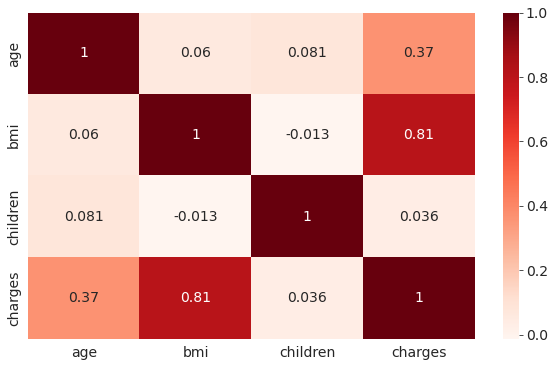

In [270]:
sns.heatmap(smoker.corr(), cmap='Reds', annot=True)

> **EXERCISE**: Repeat the steps is this section to train a linear regression model to estimate medical charges for all customers. Visualize the targets and predictions, and compute the loss. Is the loss lower or higher?

Overall corelation

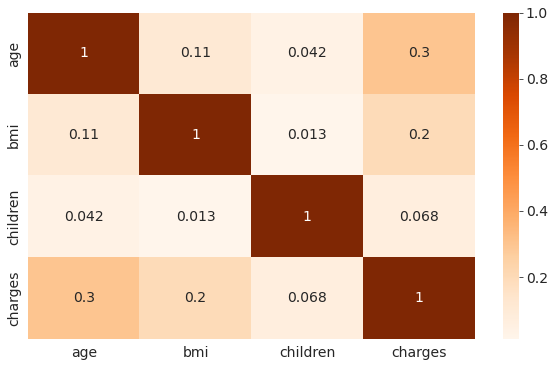

In [271]:
sns.heatmap(data.corr(), cmap='Oranges', annot=True)

## **Heatmap [`color Refrence`](https://matplotlib.org/stable/tutorials/colors/colormaps.html)**

In [272]:
inputs, target = data[['age', 'children', 'bmi']], data.charges
model = LinearRegression().fit(inputs, target)
predictions = model.predict(inputs)
loss = rmse(target, predictions)
print(f'Loss: {loss}')

Loss: 11355.317901125969


In [273]:
px.scatter(data, x='age', y='charges', color='smoker')

## `Using Categorical Features for Machine Learning`

So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals



## `Binary Categories`

The "smoker" category has just two values "yes" and "no". Let's create a new column "smoker_code" containing 0 for "no" and 1 for "yes".

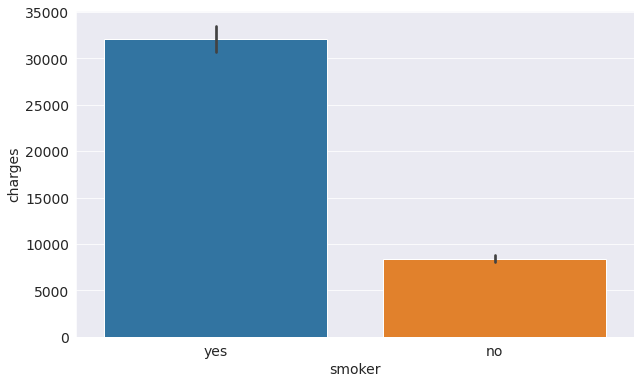

In [274]:
sns.barplot(data=data, x='smoker', y='charges')

In [275]:
smoker_codes = {'no':0, 'yes':1}
data['smoker_code'] = data.smoker.map(smoker_codes)
data.head(10)

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
5,31,female,25.740,0,no,southeast,3756.62160,0
6,46,female,33.440,1,no,southeast,8240.58960,0
7,37,female,27.740,3,no,northwest,7281.50560,0
8,37,male,29.830,2,no,northeast,6406.41070,0
9,60,female,25.840,0,no,northwest,28923.13692,0


In [276]:
data.charges.corr(data.smoker_code)

0.787251430498478

In [277]:
inputs, target = data[['age','bmi','children','smoker_code']], data.charges
model = LinearRegression().fit(inputs, target)
predictions = model.predict(inputs)
loss = rmse(target, predictions)
print(f'loss: {loss}')

loss: 6056.439217188077


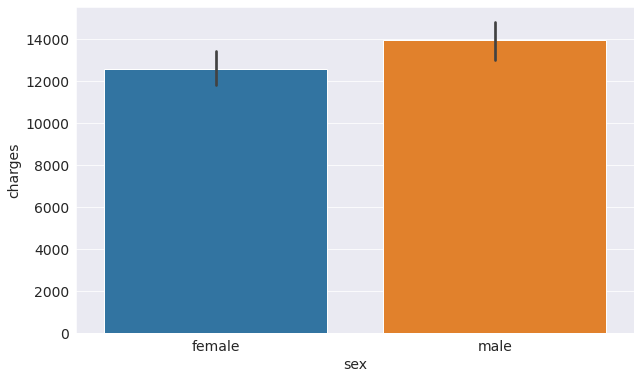

In [278]:
sns.barplot(data=data, x='sex', y='charges')

In [279]:
sex_code = {'male':1, 'female':0}
data['sex_code'] = data.sex.map(sex_code)
data.head(10)

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
5,31,female,25.740,0,no,southeast,3756.62160,0,0
6,46,female,33.440,1,no,southeast,8240.58960,0,0
7,37,female,27.740,3,no,northwest,7281.50560,0,0
8,37,male,29.830,2,no,northeast,6406.41070,0,1
9,60,female,25.840,0,no,northwest,28923.13692,0,0


In [280]:
data.charges.corr(data.sex_code)

0.057292062202025484

In [281]:
inputs, target = data[['age', 'bmi', 'children', 'sex_code', 'smoker_code']], data.charges
model = LinearRegression().fit(inputs, target)
pred = model.predict(inputs)
loss = rmse(target, pred)
print(f'loss: {loss}')

loss: 6056.100708754539


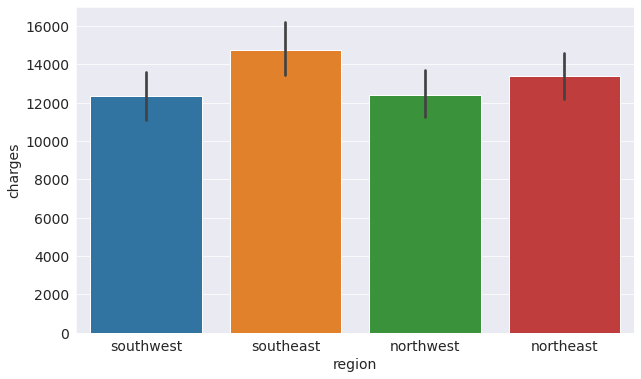

In [282]:
sns.barplot(data=data, x='region', y='charges')

In [283]:
from sklearn.preprocessing import OneHotEncoder as ohe

In [284]:
enc = ohe().fit(data[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [285]:
enc.transform([['northeast'], ['northwest']]).toarray()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [286]:
one_hot = enc.transform(data[['region']]).toarray()
print(data.region, one_hot)

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object [[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [287]:
data[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
data

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [306]:
inputs, target = data[['age', 'bmi', 'children', 'sex_code', 'smoker_code', 'northeast', 'northwest', 'southeast', 'southwest']], data.charges
model = LinearRegression().fit(inputs, target)
pred = model.predict(inputs)
loss = rmse(target, pred)
print(f'loss: {loss}')

loss: 6041.679651174455


Once again, this leads to a fairly small reduction in the loss. 

> **EXERCISE**: Are two separate linear regression models, one for smokers and one of non-smokers, better than a single linear regression model? Why or why not? Try it out and see if you can justify your answer with data.

# **`Smoker`**

In [289]:
smoker = data[data.smoker=='yes']
smoker.head(5)

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.90,0,yes,southwest,16884.9240,1,0,0.0,0.0,0.0,1.0
11,62,female,26.29,0,yes,southeast,27808.7251,1,0,0.0,0.0,1.0,0.0
14,27,male,42.13,0,yes,southeast,39611.7577,1,1,0.0,0.0,1.0,0.0
19,30,male,35.30,0,yes,southwest,36837.4670,1,1,0.0,0.0,0.0,1.0
23,34,female,31.92,1,yes,northeast,37701.8768,1,0,1.0,0.0,0.0,0.0


In [301]:
inputs, target = smoker[['age', 'children', 'bmi', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']], smoker.charges
model = LinearRegression().fit(inputs, target)
pred = model.predict(inputs)
loss = rmse(target, pred)
print(f'loss: {loss}')

loss: 5668.4678821121515


# **`Non-Smoker`**

In [291]:
non_smoker = data[data.smoker=='no']
non_smoker.head(5)

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
5,31,female,25.740,0,no,southeast,3756.62160,0,0,0.0,0.0,1.0,0.0


In [292]:
inputs, target = non_smoker[['age', 'children', 'bmi', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']], non_smoker.charges
model = LinearRegression().fit(inputs, target)
pred = model.predict(inputs)
loss = rmse(target, pred)
print(f'loss: {loss}')

loss: 4573.074988795491


In [293]:
smoker.shape

(274, 13)

In [294]:
non_smoker.shape

(1064, 13)

## Model Improvements

Let's discuss and apply some more improvements to our model.

### Feature Scaling

Recall that due to regulatory requirements, we also need to explain the rationale behind the predictions our model. 

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

To compare the importance of each feature in the model, our first instinct might be to compare their weights. 

In [315]:
columns = data.columns.drop(['smoker', 'sex', 'region', 'charges'])
weights = pd.DataFrame({
    'feature': np.append(columns, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,-131.314359
4,sex_code,23848.534542
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


While it seems like BMI and the "northeast" have a higher weight than age, keep in mind that the range of values for BMI is limited (15 to 40) and the "northeast" column only takes the values 0 and 1.

Because different columns have different ranges, we run into two issues:

1. We can't compare the weights of different column to identify which features are important
2. A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

![](https://i.imgur.com/dT5fLFI.png)

We can apply scaling using the StandardScaler class from `scikit-learn`.

In [316]:
from sklearn.preprocessing import StandardScaler

In [317]:
num_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(data[num_cols])

StandardScaler()

In [318]:
print(f'Mean: {scaler.mean_}, Varience: {scaler.var_}')

Mean: [39.20702541 30.66339686  1.09491779], Varience: [197.25385199  37.16008997   1.45212664]


In [320]:
scaled_input = scaler.transform(data[num_cols])
scaled_input

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [325]:
cat_col = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
cat_data = data[cat_col].values
inputs = np.concatenate((scaled_input, cat_data), axis=1)
target = data.charges
model = LinearRegression().fit(inputs, target)
pred = model.predict(inputs)
loss = rmse(target, pred)
print(f'loss : {loss}')

loss : 6041.679651174454


In [327]:
# columns = data.columns.drop(['smoker', 'sex', 'region', 'charges'])
weights = pd.DataFrame({
    'feature': np.append(num_cols+cat_col, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights

,feature,weight
0,age,3607.472736
1,bmi,2067.691966
2,children,572.998210
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,8466.483215


In [329]:
scaler.transform([[28,30,2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [330]:
model.predict([[-0.79795355, -0.10882659,  0.75107928, 1, 0, 0, 1, 0, 0]])

array([29875.81463371])

As you can see now, the most important feature are:

1. Smoker
2. Age
3. BMI

### Creating a Test Set

Models like the one we've created in this tutorial are designed to be used in the real world. It's common practice to set aside a small fraction of the data (e.g. 10%) just for testing and reporting the results of the model.

In [331]:
from sklearn.model_selection import train_test_split